In [2]:
import os
import pandas as pd
import matplotlib.pyplot as plt

In [5]:
mydir = "counts-sampled/"
os.listdir(mydir)
cell = "AAGCGAGT"

In [6]:
# Read total nr of reads and UFIs
df_total = pd.read_excel("TotalSeqVsUfis.xlsx")
df_total = df_total[df_total['chain'] == "IGH"] # filter on IGH
df_total.head()

,Unnamed: 0,barcode,totalseq,ufis,chain,reads_ufi,unique_ufis,unique_cdr3s
10,10,AAGCGAGT,2876236,3934,IGH,1335,263,73
19,19,AAGGAGCA,1177614,564,IGH,8,4,4
24,24,AAGGTCAG,1489266,709,IGH,15,2,2
28,28,AAGTCTCG,701508,381,IGH,6,2,3
37,37,AATCATGC,1911124,764,IGH,6,5,5


In [7]:
# Get entry for this particular barcode
df_total = df_total[df_total['barcode'] == cell]
df_total

,Unnamed: 0,barcode,totalseq,ufis,chain,reads_ufi,unique_ufis,unique_cdr3s
10,10,AAGCGAGT,2876236,3934,IGH,1335,263,73


In [8]:
# Read nr of alignments
fh = open(mydir + cell + '-count-alignments.txt')
barcodes = list()
sequences = list()
counts = list()
for line in fh:
    line = line.strip()
    count, path = line.split(" ")
    path = path.replace("align-VJC-sampled-R2/", "").replace("_S1_L001_R2_001-mapped.sam", "")
    if path == "total" or "_R1_" in path:
        continue
    barcode, nr = path.split("-")
    barcodes.append(barcode)
    sequences.append(int(nr))
    counts.append(int(count))
fh.close()
df_alignments = pd.DataFrame({'barcode': barcodes, 'sequences': sequences, 'count-alignments': counts})
df_alignments

,barcode,sequences,count-alignments
0,AAGCGAGT,1000000,42182
1,AAGCGAGT,100000,4208
2,AAGCGAGT,10000,425
3,AAGCGAGT,1000,44
4,AAGCGAGT,500000,21212
5,AAGCGAGT,50000,2105
6,AAGCGAGT,5000,200
7,AAGCGAGT,500,23


In [9]:
# Count assembled sequences
fh = open(mydir + cell + '-count-assembled.txt')
barcodes = list()
sequences = list()
matefixed = list()
assembled = list()
for line in fh:
    line = line.strip()
    path, descr, nr_assembled = line.split(":")
    path = path.replace("assembly-sampled/", "").replace("_S1-pear.log", "")
    barcode, nr = path.split("-")
    nr_assembled, rest = nr_assembled.split(" / ")
    nr_matefixed, rest = rest.split(" ")
    nr_assembled = nr_assembled.replace(",", "")
    nr_matefixed = nr_matefixed.replace(",", "")
    barcodes.append(barcode)
    sequences.append(int(nr))
    matefixed.append(int(nr_matefixed))
    assembled.append(int(nr_assembled))
fh.close()
df_assembled = pd.DataFrame({'barcode': barcodes, 'sequences': sequences, 'matefixed': matefixed, 'count-assembled': assembled})
df_assembled

,barcode,sequences,matefixed,count-assembled
0,AAGCGAGT,1000000,31266,26596
1,AAGCGAGT,100000,3219,2747
2,AAGCGAGT,10000,338,287
3,AAGCGAGT,1000,33,28
4,AAGCGAGT,500000,19955,16898
5,AAGCGAGT,50000,1039,890
6,AAGCGAGT,5000,138,118
7,AAGCGAGT,500,20,17


In [10]:
# Count nr of CDR3s
fh = open(mydir + cell + '-count-cdr3.txt')
barcodes = list()
sequences = list()
chains = list()
counts_cdr3 = list()
for line in fh:
    line = line.strip()
    path, nr_cdr3, perc = line.split("\t")
    path = path.replace("cdr3-sampled/", "").replace("_S1.assembled.fastq.gz-", "-").replace("_HUMAN-report.txt:4. Reads with CDR3", "")
    barcode, nr, chain = path.split("-")
    barcodes.append(barcode)
    sequences.append(int(nr))
    chains.append(chain)
    counts_cdr3.append(int(nr_cdr3))
fh.close()
df_cdr3s = pd.DataFrame({'barcode': barcodes, 'sequences': sequences, 'chain': chains, 'count-cdr3-reads': counts_cdr3})
df_igh = df_cdr3s[df_cdr3s['chain'] == "IGH"]
df_igk = df_cdr3s[df_cdr3s['chain'] == "IGK"]
df_igl = df_cdr3s[df_cdr3s['chain'] == "IGL"]
df_trb = df_cdr3s[df_cdr3s['chain'] == "TRB"]
df_tra = df_cdr3s[df_cdr3s['chain'] == "TRA"]
cols = ['barcode', 'sequences', 'count-cdr3-reads']
df_igh = df_igh[cols]
df_igk = df_igk[cols]
df_igl = df_igl[cols]
df_trb = df_trb[cols]
df_tra = df_tra[cols]
df_igh = df_igh.rename(columns={'count-cdr3-reads': 'count-cdr3-reads-IGH'})
df_igk = df_igk.rename(columns={'count-cdr3-reads': 'count-cdr3-reads-IGK'})
df_igl = df_igl.rename(columns={'count-cdr3-reads': 'count-cdr3-reads-IGL'})
df_trb = df_trb.rename(columns={'count-cdr3-reads': 'count-cdr3-reads-TRB'})
df_tra = df_tra.rename(columns={'count-cdr3-reads': 'count-cdr3-reads-TRA'})
df_tra

,barcode,sequences,count-cdr3-reads-TRA
3,AAGCGAGT,1000000,2
11,AAGCGAGT,500000,1


In [6]:
# Merge tables
df = pd.merge(df_alignments, df_assembled, how='left', on=['barcode', 'sequences'])
df = pd.merge(df, df_igh, how='left', on=['barcode', 'sequences'])
df = pd.merge(df, df_igk, how='left', on=['barcode', 'sequences'])
df = pd.merge(df, df_igl, how='left', on=['barcode', 'sequences'])
df = pd.merge(df, df_trb, how='left', on=['barcode', 'sequences'])
df = pd.merge(df, df_tra, how='left', on=['barcode', 'sequences'])
df = df.fillna(0)
df

,barcode,sequences,count-alignments,matefixed,count-assembled,count-cdr3-reads-IGH,count-cdr3-reads-IGK,count-cdr3-reads-IGL,count-cdr3-reads-TRB,count-cdr3-reads-TRA
0,TCCTAGCT,1000000,1106,613.0,263.0,0.0,0.0,0.0,0.0,0.0
1,TCCTAGCT,100000,103,56.0,27.0,0.0,0.0,0.0,0.0,0.0
2,TCCTAGCT,10000,11,9.0,5.0,0.0,0.0,0.0,0.0,0.0
3,TCCTAGCT,1000,1,1.0,1.0,0.0,0.0,0.0,0.0,0.0
4,TCCTAGCT,500000,549,472.0,214.0,0.0,0.0,0.0,0.0,0.0
5,TCCTAGCT,50000,60,54.0,27.0,0.0,0.0,0.0,0.0,0.0
6,TCCTAGCT,5000,6,4.0,2.0,0.0,0.0,0.0,0.0,0.0
7,TCCTAGCT,500,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


## Create saturation plots

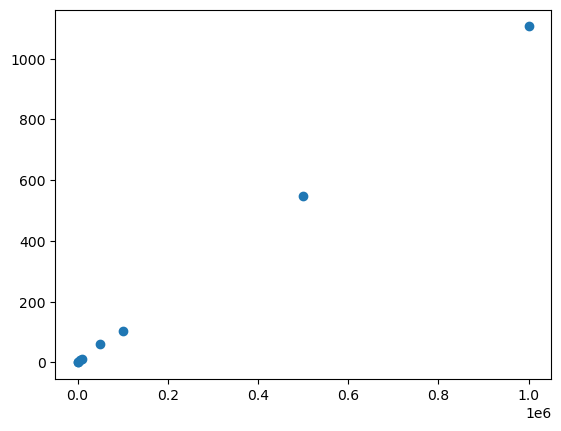

In [7]:
plt.scatter(df['sequences'], df['count-alignments'])
plt.show()

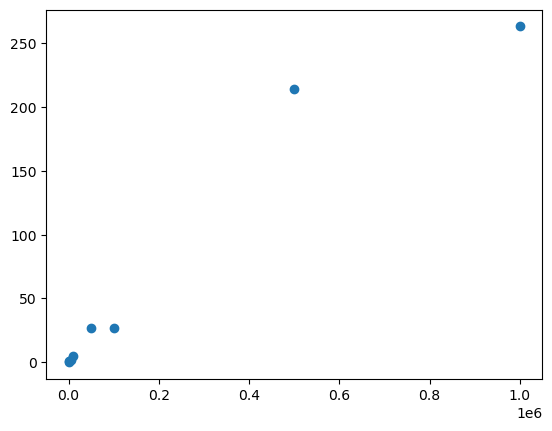

In [8]:
plt.scatter(df['sequences'], df['count-assembled'])
plt.show()

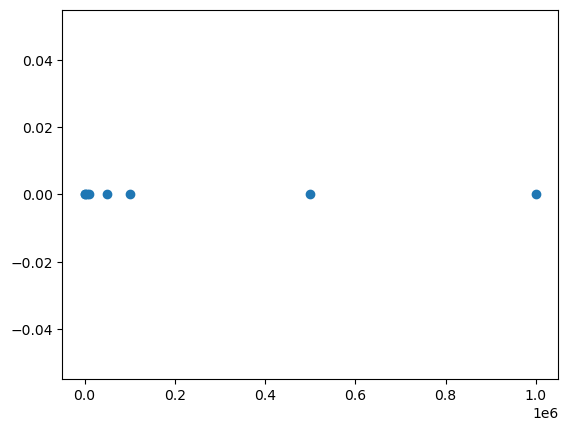

In [9]:
plt.scatter(df['sequences'], df['count-cdr3-reads-IGH'])
plt.show()

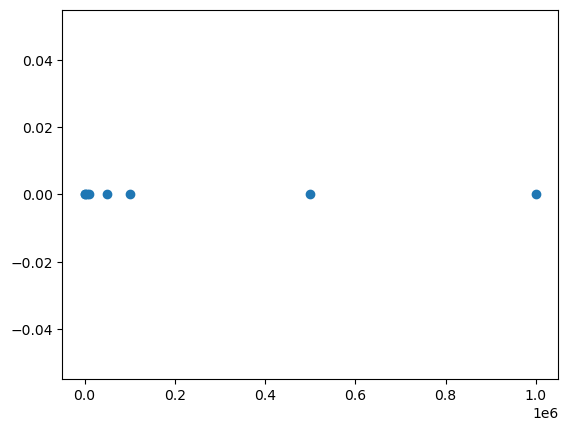

In [10]:
plt.scatter(df['sequences'], df['count-cdr3-reads-IGK'])
plt.show()

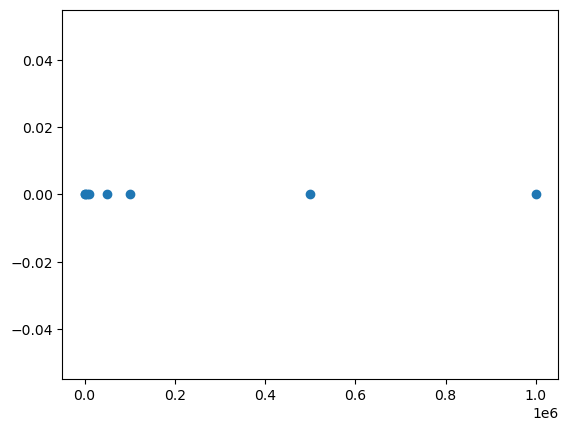

In [11]:
plt.scatter(df['sequences'], df['count-cdr3-reads-IGL'])
plt.show()

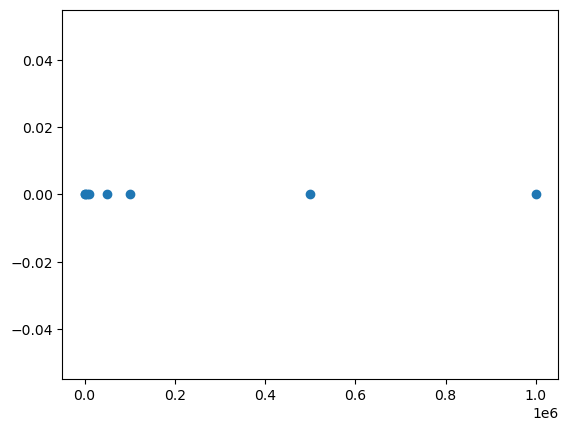

In [12]:
plt.scatter(df['sequences'], df['count-cdr3-reads-TRB'])
plt.show()

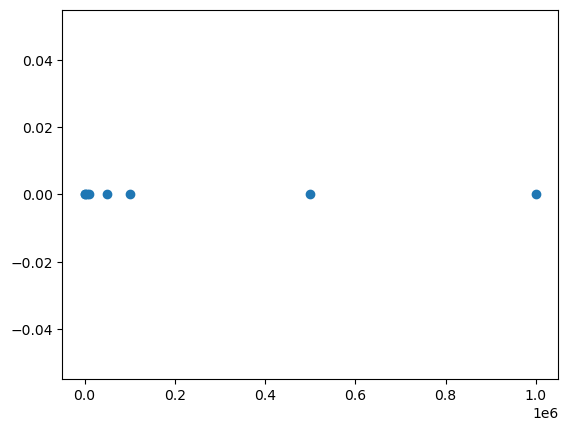

In [13]:
plt.scatter(df['sequences'], df['count-cdr3-reads-TRA'])
plt.show()